In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("glass.csv")

In [3]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 78.2 KB


In [6]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0


In [7]:
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type    float64
dtype: object

In [9]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

 * 1. Exploratory Data Analysis (EDA):-

In [10]:
df.isna()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
994,True,True,True,True,True,True,True,True,True,True
995,True,True,True,True,True,True,True,True,True,True
996,True,True,True,True,True,True,True,True,True,True
997,True,True,True,True,True,True,True,True,True,True


In [11]:
df.isna().sum()

RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64

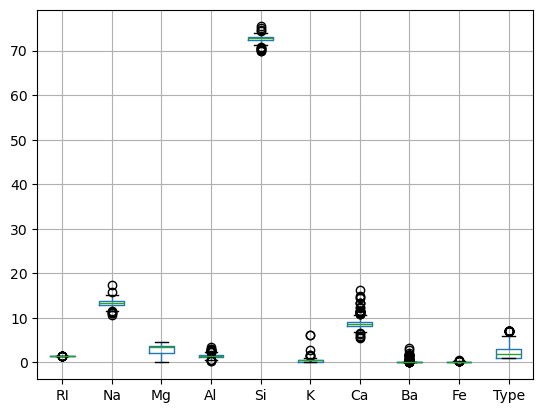

In [12]:
# Checking for outliers :
df.boxplot()
plt.show()

* 2: Data Visualization:-

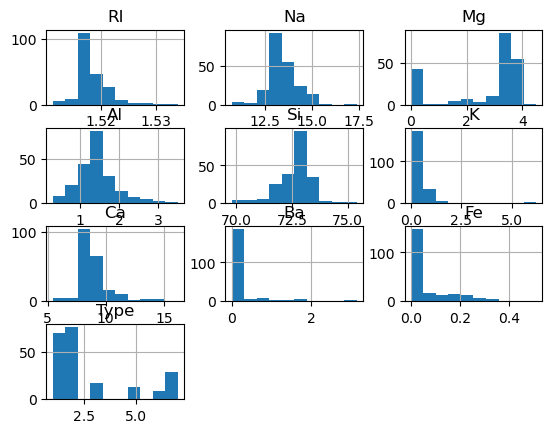

In [13]:
df.hist()
plt.show()
plt.tight_layout()

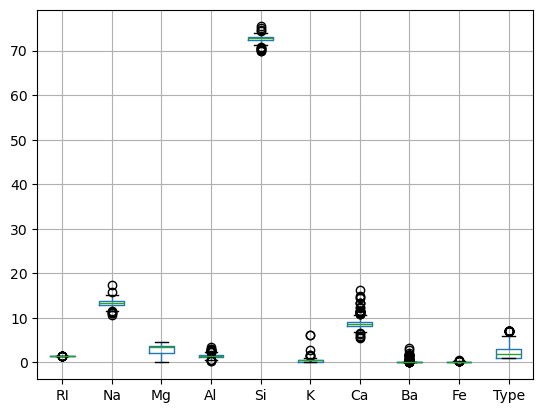

In [14]:
df.boxplot()
plt.show()

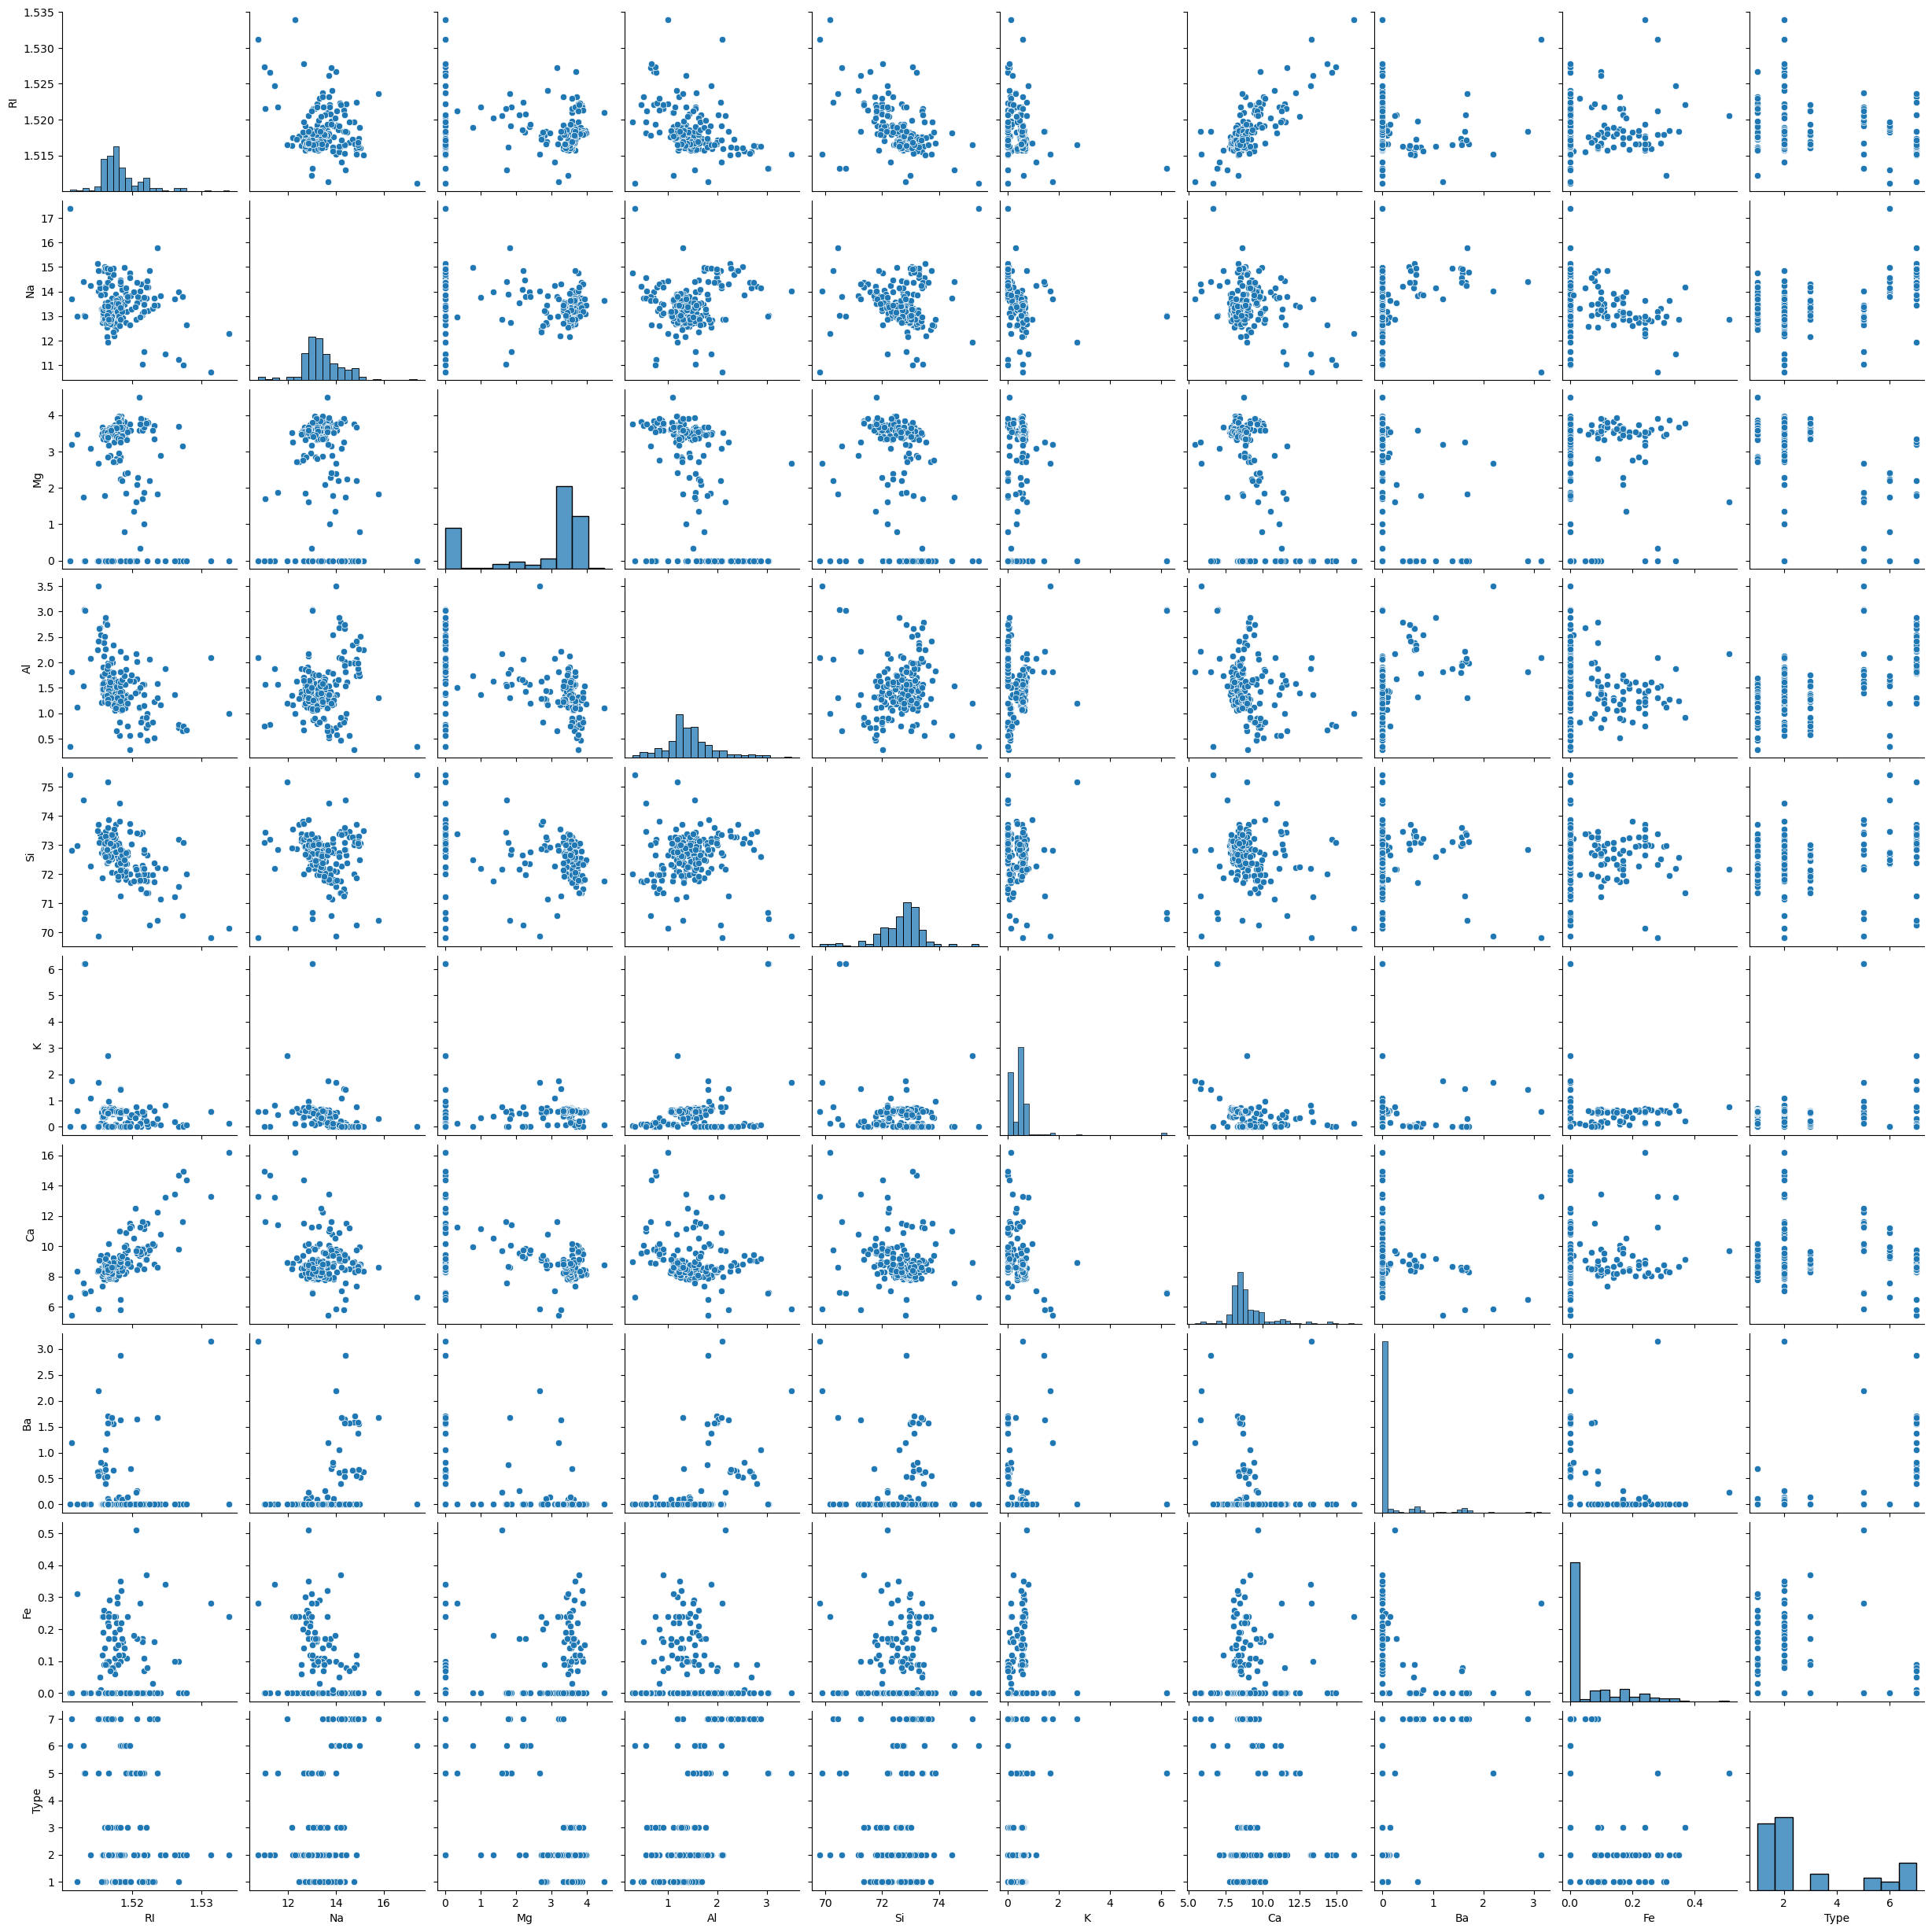

In [15]:
sns.pairplot(df)
plt.show()

* 3: Data Preprocessing:-

In [16]:
# handeling missing values :
len(df)

999

In [17]:
df.isna().sum()

RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64

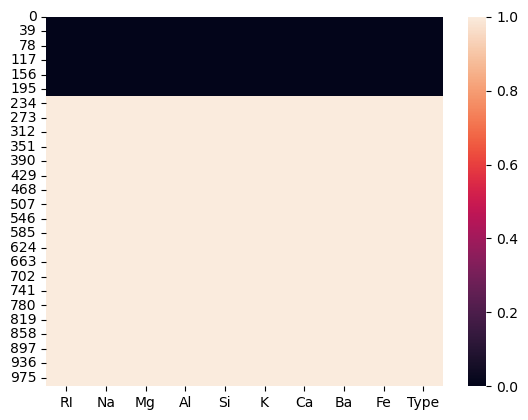

In [18]:
sns.heatmap(df.isna())
plt.show()

In [19]:
df.isna().sum()/len(df)*100

RI      78.578579
Na      78.578579
Mg      78.578579
Al      78.578579
Si      78.578579
K       78.578579
Ca      78.578579
Ba      78.578579
Fe      78.578579
Type    78.578579
dtype: float64

In [20]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
RI_median = df['RI'].median()
RI_median

1.51768

In [22]:
df['RI'].fillna(RI_median,inplace=True)

In [23]:
df.isna().sum()

RI        0
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64

In [24]:
Na_median = df['Na'].median()
Na_median

13.3

In [25]:
df['Na'].fillna(Na_median,inplace=True)

In [26]:
Mg_mean = df['Mg'].mean()
Mg_mean

np.float64(2.684532710280374)

In [27]:
df['Mg'].fillna(Mg_mean,inplace=True)

In [28]:
Al_median = df['Al'].median()
Al_median

1.36

In [29]:
df['Al'].fillna(Al_median,inplace=True)

In [30]:
Si_median = df['Si'].median()
Si_median

72.79

In [31]:
df['Si'].fillna(Si_median,inplace=True)

In [32]:
K_median = df['K'].median()
K_median

0.555

In [33]:
df['K'].fillna(K_median,inplace=True)

In [34]:
Ca_median = df['Ca'].median()
Ca_median

8.6

In [35]:
df['Ca'].fillna(Ca_median,inplace=True)

In [36]:
Ba_median = df['Ba'].median()
Ba_median

0.0

In [37]:
df['Ba'].fillna(Ba_median,inplace=True)

In [38]:
Fe_median = df['Fe'].median()
Fe_median

0.0

In [39]:
df['Fe'].fillna(Fe_median,inplace=True)

In [40]:
Type_median = df['Type'].median()
Type_median

2.0

In [41]:
df['Type'].fillna(Type_median,inplace=True)

In [42]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

* Except Mg columns all are replaced by the median because they have the outliers and the mg column has no outliers that is why i replaces it's missing values by the mean of the column.

* NOW , there is no missing value in the dataset.

* there is no columns which have the datatype as the categorical so no need to convert or apply OneHot Encoding.

In [43]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [44]:
mn = MinMaxScaler()

In [45]:
minmax_scaled = pd.DataFrame(mn.fit_transform(df), columns=df.columns)
minmax_scaled

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0,0.000000
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0,0.000000
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0,0.000000
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0,0.000000
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
994,0.286655,0.386466,0.597891,0.333333,0.532143,0.089372,0.294610,0.0,0.0,0.166667
995,0.286655,0.386466,0.597891,0.333333,0.532143,0.089372,0.294610,0.0,0.0,0.166667
996,0.286655,0.386466,0.597891,0.333333,0.532143,0.089372,0.294610,0.0,0.0,0.166667
997,0.286655,0.386466,0.597891,0.333333,0.532143,0.089372,0.294610,0.0,0.0,0.166667


In [46]:
minmax_scaled.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.293100,0.389940,0.597891,0.338999,0.526823,0.087373,0.301716,0.011904,0.023946,0.194528
std,0.062814,0.057119,0.148411,0.072670,0.064705,0.048670,0.062602,0.076407,0.099479,0.170553
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.286655,0.386466,0.597891,0.333333,0.532143,0.089372,0.294610,0.000000,0.000000,0.166667
50%,0.286655,0.386466,0.597891,0.333333,0.532143,0.089372,0.294610,0.000000,0.000000,0.166667
75%,0.286655,0.386466,0.597891,0.333333,0.532143,0.089372,0.294610,0.000000,0.000000,0.166667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
df['type'] = df['Type'].apply(lambda x: 1 if x > 0 else 0)

* 4: Random Forest Model Implementation :-

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
array = df.values

In [50]:
array=df.values
X = array[:,0:9]
Y = array[:,9]

num_trees = 100
max_features = 3 
kfold = KFold(n_splits=10)

model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

results = cross_val_score(model, X, Y, cv=kfold)

In [51]:
results

array([0.21, 0.25, 0.99, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ])

In [52]:
print(results.mean())

0.845


In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=0)

In [56]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=2,random_state=0)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [57]:
Y_pred = model.predict(X_test)

In [58]:
Y_pred

array([2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 7., 2.,
       2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2.,
       2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 7., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 7., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 7., 2., 2., 2., 2., 2., 1., 2.,
       7., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2.])

In [59]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         1.0       0.60      0.75      0.67        12
         2.0       0.98      0.97      0.98       183
         3.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         1
         7.0       0.60      1.00      0.75         3

    accuracy                           0.94       200
   macro avg       0.44      0.54      0.48       200
weighted avg       0.94      0.94      0.94       200



* 5: Bagging and Boosting Methods:-


In [60]:
# Apply  Bagging :
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [61]:
array=df.values
X = array[:,0:9]
Y = array[:,9]

seed = 7

kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100

#model = BaggingClassifier(estimator=cart, n_estimators=num_trees, random_state=seed) #Classifier, n_estimators: default=10
model = BaggingClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)

In [62]:
results

array([0.14, 0.23, 0.99, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ])

In [63]:
print(results.mean())

0.836


In [64]:
# AdaBoost Classification
from sklearn.ensemble import AdaBoostClassifier
array=df.values
X = array[:,0:9]
Y = array[:,9]
num_trees = 40
seed=7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)

In [65]:
results

array([0.93      , 0.91      , 0.93      , 0.91      , 0.91      ,
       0.89      , 0.94      , 0.93      , 0.96      , 0.92929293])

In [66]:
print(results.mean())

0.9239292929292928


After ada boosting method apply to the model ,Accuracy has lots of increased.

Additional Notes:-

*  Bagging (Bootstrap Aggregating):-
  
   Bagging is an ensemble technique where multiple independent models are trained in parallel on different bootstrap samples of the dataset.


   Each model learns separately, and the final prediction is made by majority voting (classification) or averaging (regression).


How it works:

   Randomly sample data with replacement → create multiple subsets.

  
   Train one model on each subset (e.g., Decision Trees).

  
   Combine predictions → vote/average.

* Boosting:-

  
   Boosting is an ensemble technique where models are trained sequentially, and each new model focuses on the mistakes of the previous one.

  
How it works:


   Start with a weak model.
  
   Increase weights for incorrectly predicted samples.
  
   Train the next model to fix earlier errors.
  
   Combine all models (weighted voting).
  



* 2:- Explain how to handle imbalance in the data.

  
  
* Class imbalance occurs when one class has many more samples than others (e.g., 90% vs 10%).


This can degrade model performance because the model may learn to predict only the majority class.


Techniques to handle imbalance:

A) Resampling Techniques

1. Oversampling the minority class.

2. Class Weighting.

3. Use Ensemble Designed for Imbalance.

4. Use Proper Evaluation Metrics.

